In [61]:
import sys
sys.path.append("..")

# basics
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import copy
import qutip
import importlib

# custom stuff
import system.from_higher_basis_truncation_tunable_full_cosine as system
import utils.solver as solver
import utils.floquet_solver as fsolver
import pulse.tanh as tanh
import utils.expectation_values as expv
import utils.graph as graph
import utils.saver as saver
import utils.floquetify as floqify
import optimization.grape as grape
importlib.reload(grape)
import optimization.lowpass as lp

# parallel utils
from qutip.parallel import parallel_map as parallel_map
from qutip.parallel import parfor as parfor
from tqdm import tqdm as tqdm

pass

In [62]:
super_results = saver.load("imperfect_super_results_Dec12")
chosen_result = None
for r in super_results:
    if r["duration"] < 50:
        chosen_result = r
        break

print(chosen_result)

{'amplitude': 9.814684629293122, 'offset': 0.20467709157484842, 'duration': 49.54717684681238, 'fidelity': 0.9994340391691672, 'end_early': False, 'iterations': 51}


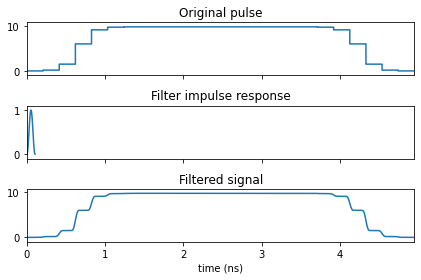

In [63]:
offset = chosen_result["offset"]
duration = chosen_result["duration"]
amplitude = chosen_result["amplitude"]
cut_factor = 3
ramp_slope = 0.5
drive_frequency = system.first_energy_spacing/3 - offset
tlist = np.linspace(0, duration, int(duration*100))
bin_size = 2
smoothing_time = 10
binned_tlist = np.linspace(0, tlist[-1], int(tlist[-1]/bin_size))


tanh.setup(amplitude, 0, ramp_slope, cut_factor, tlist)
lp.applyLowerPassFilter(tanh.get_pulse(binned_tlist), binned_tlist, bin_size*10, 10000, smoothing_time, True)
plt.show()

In [64]:
grape.setup(system, tanh.get_pulse(binned_tlist), offset, duration, bin_size, smoothing_time)

In [65]:
grape_result = grape.single_run(True)

10.0%. Run time:   1.62s. Est. time left: 00:00:00:14
20.0%. Run time:   6.51s. Est. time left: 00:00:00:26
30.0%. Run time:  14.38s. Est. time left: 00:00:00:33
40.0%. Run time:  18.88s. Est. time left: 00:00:00:28
50.0%. Run time:  20.60s. Est. time left: 00:00:00:20
60.0%. Run time:  22.34s. Est. time left: 00:00:00:14
70.0%. Run time:  26.88s. Est. time left: 00:00:00:11
80.0%. Run time:  35.85s. Est. time left: 00:00:00:08
90.0%. Run time:  41.39s. Est. time left: 00:00:00:04
Total run time:  43.01s


Fidelity = 0.974025, Offset = 0.204677


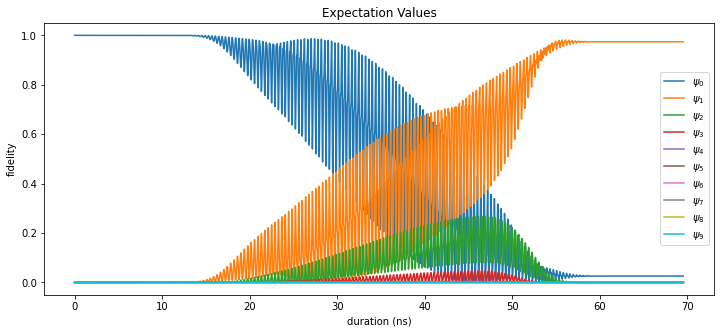

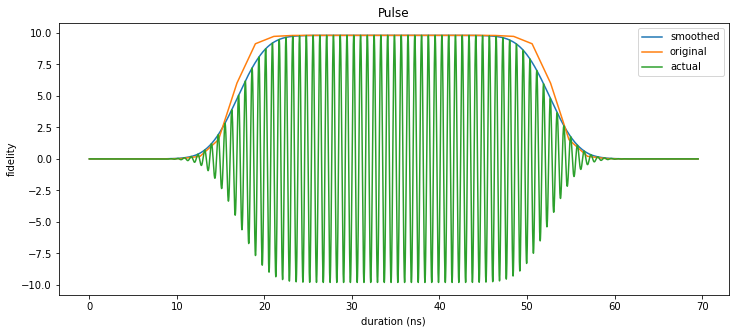

In [66]:
grape.graph_last_solution()

In [67]:
optimized_grape_result = grape.optimize()

1 : 0.974025
2 : 0.974024
3 : 0.974025
4 : 0.974025
5 : 0.974025
6 : 0.974025
7 : 0.974025
8 : 0.974025
9 : 0.974075
10 : 0.974974
11 : 0.977325
12 : 0.824632
13 : 0.828228
14 : 0.842572
15 : 0.840263
16 : 0.835166
17 : 0.831205
18 : 0.829116
19 : 0.829121
20 : 0.831203
21 : 0.835169
22 : 0.840263
23 : 0.842573
24 : 0.828229
25 : 0.824629
26 : 0.977312
27 : 0.974969
28 : 0.974078
29 : 0.974025
30 : 0.974025
31 : 0.974025
32 : 0.974025
33 : 0.974025
34 : 0.974025
35 : 0.974026
36 : 0.864696
37 : 0.973504
38 : 0.973151
39 : 0.971035
40 : 0.970413
41 : 0.965017
42 : 0.963758
43 : 0.962415
44 : 0.962845
45 : 0.961897
46 : 0.965611
47 : 0.964920
48 : 0.971230
49 : 0.970783
50 : 0.955025
51 : 0.924557
52 : 0.968364
53 : 0.823504
54 : 0.965236
55 : 0.830472
56 : 0.968860
57 : 0.838172
58 : 0.969286
59 : 0.832052
60 : 0.969355
61 : 0.838781
62 : 0.969810
63 : 0.825593
64 : 0.970363
65 : 0.834200
66 : 0.970345
67 : 0.952995
68 : 0.968864
69 : 0.822542
70 : 0.971292
71 : 0.944335
72 : 0.975578
7

capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.


KeyboardInterrupt: 

Fidelity = 0.999761, Offset = 0.216195


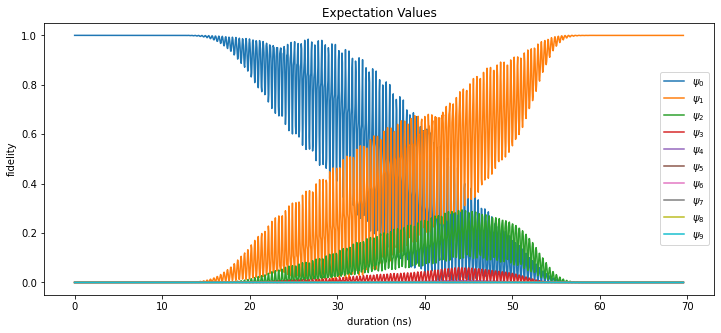

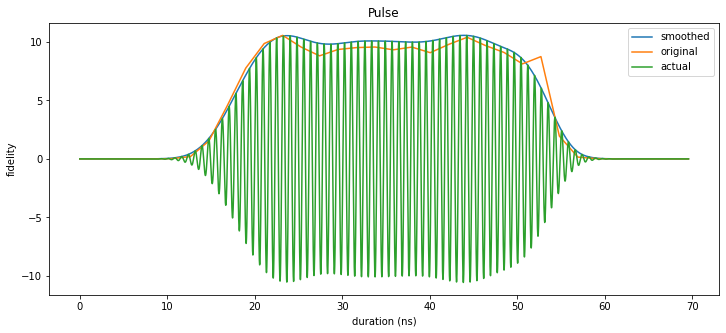

In [68]:
grape.graph_last_solution()